In [28]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_blobs

In [46]:
df = pd.read_csv(Path('Resources/Data/BrooklynHomes.csv'))
df_mb = df[df['neighborhood'] == 'MILL BASIN']
df_mb.head()

/var/folders/zq/zj22llm50v105v327lqpc9w40000gn/T/ipykernel_15505/640187311.py:1: DtypeWarning: Columns (9,35,37,70) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(Path('Resources/Data/BrooklynHomes.csv'))


,Unnamed: 0.1,Unnamed: 0,borough,neighborhood,building_class_category,block,lot,building_class,address,apartment_number,...,BldgFront,BldgDepth,Ext,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,HistDist,Landmark
221,221,2722,3,MILL BASIN,01 ONE FAMILY HOMES,8470,1059,NaN,6097 STRICKLAND AVENUE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1447,1447,6575,3,MILL BASIN,01 ONE FAMILY HOMES,8614,56,A9,2596 NATIONAL DRIVE,NaN,...,27.00,60.0,G,18614.0,80648.0,1550.0,1550.0,1965.0,NaN,NaN
1861,1861,7708,3,MILL BASIN,01 ONE FAMILY HOMES,8592,84,A9,2400 NATIONAL DRIVE,NaN,...,27.33,55.0,NaN,27942.0,77846.0,0.0,0.0,1965.0,NaN,NaN
2297,2297,8801,3,MILL BASIN,01 ONE FAMILY HOMES,8637,29,A3,2323 EAST 63RD STREET,NaN,...,27.33,36.5,NaN,16212.0,66358.0,0.0,0.0,1950.0,NaN,NaN
2307,2307,8831,3,MILL BASIN,01 ONE FAMILY HOMES,8614,58,A1,2600 NATIONAL DRIVE,NaN,...,27.00,60.0,G,26601.0,83264.0,0.0,0.0,1965.0,NaN,NaN


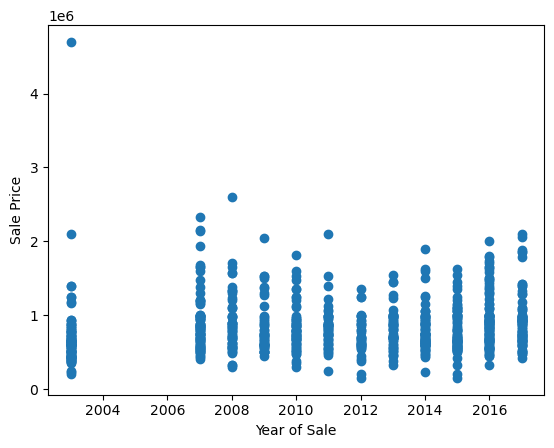

In [47]:
plt.scatter(df_mb.year_of_sale, df_mb.sale_price)
plt.xlabel('Year of Sale')
plt.ylabel('Sale Price')
plt.autoscale(enable=True, axis='y')
plt.show()

In [48]:
X = df_mb.year_of_sale.values.reshape(-1, 1)

In [49]:
y = df_mb.sale_price

In [50]:
model = LinearRegression()

In [51]:
model.fit(X, y)

LinearRegression()

In [52]:
y_pred = model.predict(X)
print(y_pred.shape)

(836,)


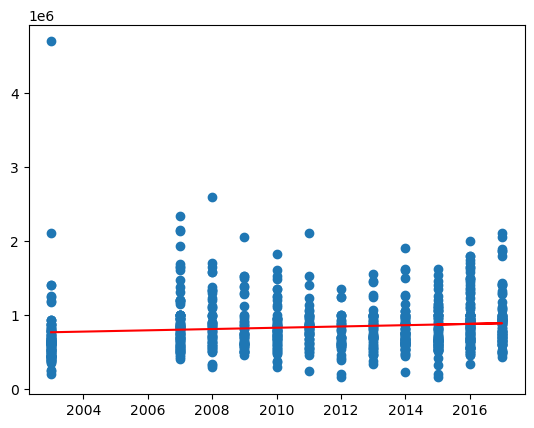

In [53]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [54]:
print(model.coef_)
print(model.intercept_)

[8715.0187299]
-16693836.157559374


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    random_state=1)
X_train.shape

(627, 1)

In [56]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                               max_iter=200,
                               random_state=1)

In [57]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [60]:
y_pred = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head(20)

,Prediction,Actual
0,995000.0,325000.0
1,995000.0,915000.0
2,995000.0,930000.0
3,995000.0,400000.0
4,995000.0,955000.0
5,995000.0,797000.0
6,995000.0,730000.0
7,995000.0,730000.0
8,995000.0,2057000.0
9,995000.0,740000.0


In [61]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.004784688995215311
